# Chohort Analysis

### Before we start

Hi, this is a cohort analysis that I did on my internship. I made some edits so that it could be read clearer. The Cohort Analysis is a method used to track the performance of different user groups. Based on this method, we could also conduct survival analysis and other similar analysis.

The tables are from the company database and some of the time objects are pretty messy. You will see me doing a lot of data type transformation on them. That is because when I pull them, all three datasets have different time formats. Some are string and some are exhaustive time descriptions(including time zone etc). In order to do operation on them I have to play around with them.



## Cleaning the data and creating the charts

In [137]:
# importing some packages that are essential
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [96]:
#importing data
participation = pd.read_csv('participation.csv')
brands = pd.read_csv('brand_metrics.csv')
user_logins = pd.read_csv('user_logins.csv')

In [97]:
participation.head()

,brand_id|campaign_id|campaign_start_date
0,6825|5550|2019-06-11
1,7118|5493|2019-06-10
2,1027|5493|2019-06-10
3,1613|5493|2019-06-10
4,7464|5493|2019-06-10


In [98]:
#cleaning participation data into forms usable
p_split = participation['brand_id|campaign_id|campaign_start_date'].str.split('|', expand = True)
p_split.head()

,0,1,2
0,6825,5550,2019-06-11
1,7118,5493,2019-06-10
2,1027,5493,2019-06-10
3,1613,5493,2019-06-10
4,7464,5493,2019-06-10


In [99]:
#name the columns
p_split.columns = ['brand_id', 'campaign_id', 'campaign_start_date']
p_split.head()

,brand_id,campaign_id,campaign_start_date
0,6825,5550,2019-06-11
1,7118,5493,2019-06-10
2,1027,5493,2019-06-10
3,1613,5493,2019-06-10
4,7464,5493,2019-06-10


In [100]:
#converting time object to a uniform form
p_split['campaign_start_date'] = pd.to_datetime(p_split['campaign_start_date'])
p_split['campaign_start_date'] = p_split['campaign_start_date'].dt.tz_localize('UTC')
p_split['campaign_start_date'] = p_split['campaign_start_date'].dt.tz_convert('UTC')
#truncate date to year and month
p_split['ym_cdate'] = p_split['campaign_start_date'].apply(lambda x: x.strftime('%y-%m'))
p_split['brand_id'] = p_split['brand_id'].astype(str)
p_split.head()

,brand_id,campaign_id,campaign_start_date,ym_cdate
0,6825,5550,2019-06-11 00:00:00+00:00,19-06
1,7118,5493,2019-06-10 00:00:00+00:00,19-06
2,1027,5493,2019-06-10 00:00:00+00:00,19-06
3,1613,5493,2019-06-10 00:00:00+00:00,19-06
4,7464,5493,2019-06-10 00:00:00+00:00,19-06


In [101]:
# converting time objects to a uniform form
brands['joined_dojomojo'] = pd.to_datetime(brands['joined_dojomojo'])
brands['joined_dojomojo'] = brands['joined_dojomojo'].dt.tz_convert('UTC')

#date truncated to year and month
brands['ym_joined'] = brands['joined_dojomojo'].apply(lambda x: x.strftime('%y-%m'))
brands['brand_id'] = brands['brand_id'].astype(str)
brands.head()

,brand_id,most_recent_login,joined_dojomojo,list_size,f2m_applications,l2m_applications,f2m_invites,l2m_invites,f2m_accepted_applications,l2m_accepted_applications,f2m_accepted_invites,l2m_accepted_invites,ym_joined
0,1175,2018-04-09 20:24:27.031000+00:00,2017-02-09 16:35:08.457000+00:00,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17-02
1,1176,2017-04-15 18:24:22.649000+00:00,2017-02-10 21:34:22.183000+00:00,1400,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,17-02
2,1177,2017-04-24 19:26:08.397000+00:00,2017-02-11 02:59:17.076000+00:00,2500,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,17-02
3,1178,2018-08-22 21:08:25.648000+00:00,2017-02-11 16:07:27.216000+00:00,150000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,17-02
4,1179,2019-04-15 15:41:04.288000+00:00,2017-02-11 16:16:28.394000+00:00,85000,0.0,0.0,3.0,2.0,0.0,0.0,1.0,0.0,17-02


In [102]:
#merge the table
cohorts = pd.merge(p_split, brands[['brand_id', 'joined_dojomojo','ym_joined']], on = 'brand_id')
cohorts.head()

,brand_id,campaign_id,campaign_start_date,ym_cdate,joined_dojomojo,ym_joined
0,6825,5550,2019-06-11 00:00:00+00:00,19-06,2019-03-07 23:15:33+00:00,19-03
1,6825,5067,2019-04-08 00:00:00+00:00,19-04,2019-03-07 23:15:33+00:00,19-03
2,7118,5493,2019-06-10 00:00:00+00:00,19-06,2019-04-10 19:55:37+00:00,19-04
3,7118,5125,2019-04-18 00:00:00+00:00,19-04,2019-04-10 19:55:37+00:00,19-04
4,1613,5493,2019-06-10 00:00:00+00:00,19-06,2017-06-15 20:37:27.760000+00:00,17-06


In [103]:
#creating time of use for the cohort groups on the products
cohorts['gap'] = cohorts.apply(lambda row: round( (row['campaign_start_date'] - row['joined_dojomojo']).days/30, 0), axis=1)

In [104]:
cohorts.head()

,brand_id,campaign_id,campaign_start_date,ym_cdate,joined_dojomojo,ym_joined,gap
0,6825,5550,2019-06-11 00:00:00+00:00,19-06,2019-03-07 23:15:33+00:00,19-03,3.0
1,6825,5067,2019-04-08 00:00:00+00:00,19-04,2019-03-07 23:15:33+00:00,19-03,1.0
2,7118,5493,2019-06-10 00:00:00+00:00,19-06,2019-04-10 19:55:37+00:00,19-04,2.0
3,7118,5125,2019-04-18 00:00:00+00:00,19-04,2019-04-10 19:55:37+00:00,19-04,0.0
4,1613,5493,2019-06-10 00:00:00+00:00,19-06,2017-06-15 20:37:27.760000+00:00,17-06,24.0


In [105]:
#clean data
user_logins.dropna(inplace = True)
#uniforming brand_id dtype to string
#before converting to string, convert the float into int so the format is the same
user_logins['brand_id'].dropna(axis = 0, inplace = True)
user_logins['brand_id'] = user_logins['brand_id'].apply(lambda x: round(x))
#convert to string
user_logins['brand_id'] = user_logins['brand_id'].astype(str)
# create a general table for multiple cohort analysis
df = pd.merge(cohorts, user_logins[['brand_id', 'created_at']], on = "brand_id", how = 'inner')
df.head()

,brand_id,campaign_id,campaign_start_date,ym_cdate,joined_dojomojo,ym_joined,gap,created_at
0,6825,5550,2019-06-11 00:00:00+00:00,19-06,2019-03-07 23:15:33+00:00,19-03,3.0,2019-03-07 23:15:34.992000+00:00
1,6825,5550,2019-06-11 00:00:00+00:00,19-06,2019-03-07 23:15:33+00:00,19-03,3.0,2019-03-08 00:16:39.993000+00:00
2,6825,5550,2019-06-11 00:00:00+00:00,19-06,2019-03-07 23:15:33+00:00,19-03,3.0,2019-03-08 16:07:35.200000+00:00
3,6825,5550,2019-06-11 00:00:00+00:00,19-06,2019-03-07 23:15:33+00:00,19-03,3.0,2019-03-11 16:16:53.449000+00:00
4,6825,5550,2019-06-11 00:00:00+00:00,19-06,2019-03-07 23:15:33+00:00,19-03,3.0,2019-03-11 19:18:32.154000+00:00


In [106]:
#creating the cohort peirod
#converting the str to time so that we could do operation on them
df['created_at'] = pd.to_datetime(df['created_at'])
#creating cohort periods(how long they have been on the product)
df['cohort_period'] = df.apply(lambda row: round( (row['created_at'] - row['joined_dojomojo']).days/30, 0), axis=1)

In [107]:
df.head()

,brand_id,campaign_id,campaign_start_date,ym_cdate,joined_dojomojo,ym_joined,gap,created_at,cohort_period
0,6825,5550,2019-06-11 00:00:00+00:00,19-06,2019-03-07 23:15:33+00:00,19-03,3.0,2019-03-07 23:15:34.992000+00:00,0.0
1,6825,5550,2019-06-11 00:00:00+00:00,19-06,2019-03-07 23:15:33+00:00,19-03,3.0,2019-03-08 00:16:39.993000+00:00,0.0
2,6825,5550,2019-06-11 00:00:00+00:00,19-06,2019-03-07 23:15:33+00:00,19-03,3.0,2019-03-08 16:07:35.200000+00:00,0.0
3,6825,5550,2019-06-11 00:00:00+00:00,19-06,2019-03-07 23:15:33+00:00,19-03,3.0,2019-03-11 16:16:53.449000+00:00,0.0
4,6825,5550,2019-06-11 00:00:00+00:00,19-06,2019-03-07 23:15:33+00:00,19-03,3.0,2019-03-11 19:18:32.154000+00:00,0.0


In [135]:
# let's visualize it with a heat map
# for our convenience I write it as a function so that we could call later
def heatmap(x:pd.DataFrame, title = 'This is just a chart without name', unit = '.2g'):
    # adjusting chart size with matplotlib functions
    plt.figure(figsize = (20, 16))
    ax = plt.axes()
    ax.set_title(title, fontsize = 20)
    
    # heatmap function from seaborn is my favorite
    sb.heatmap(x , annot = True, linewidths = 5, cmap = 'coolwarm', fmt = unit)

    plt.show()


## analysis on login 

In [115]:
#creating the cohort table for login
cohort_login = df.groupby(['ym_joined','cohort_period']).nunique().unstack()[['created_at']]
cohort_login.head()

created_at                                                   \
cohort_period       0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    
ym_joined                                                                   
17-02               85.0  131.0   58.0   29.0   50.0   55.0   45.0   39.0   
17-03              382.0  442.0  319.0  260.0  287.0  214.0  182.0  224.0   
17-04              221.0  321.0  333.0  265.0  233.0  140.0  174.0  145.0   
17-05              353.0  419.0  414.0  301.0  251.0  236.0  241.0  241.0   
17-06              342.0  429.0  342.0  278.0  228.0  196.0  189.0  163.0   

                             ...                                            \
cohort_period   8.0    9.0   ...   19.0   20.0   21.0   22.0   23.0   24.0   
ym_joined                    ...                                             
17-02           35.0   32.0  ...   31.0   56.0   31.0   28.0   35.0   24.0   
17-03          212.0  217.0  ...  173.0  149.0   92.0   71.0   95.0   76.0   
17-04          114.0  159.0  ...   74.0   63.0   42.0   74.0   76.0   76.0   
17-05          211.0  154.0  ...  137.0  121.0  129.0  139.0  178.0  243.0   
17-06          231.0  171.0  ...  148.0  141.0  148.0  158.0  115.0  151.0   

                                        
cohort_period   25.0  26.0  27.0  28.0  
ym_joined                               
17-02           14.0   7.0   9.0  44.0  
17-03           96.0  77.0  72.0  13.0  
17-04           57.0  34.0   4.0   NaN  
17-05          153.0  20.0   NaN   NaN  
17-06           14.0   NaN   NaN   NaN  

[5 rows x 29 columns]

In [120]:
#since the number is generally between 100 and 1000, let's rescale it by dividing with 100 for better viz
cohort_login = cohort_login.divide(100)
cohort_login.head()

created_at                                                  \
cohort_period       0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0    
ym_joined                                                                  
17-02               0.85  1.31  0.58  0.29  0.50  0.55  0.45  0.39  0.35   
17-03               3.82  4.42  3.19  2.60  2.87  2.14  1.82  2.24  2.12   
17-04               2.21  3.21  3.33  2.65  2.33  1.40  1.74  1.45  1.14   
17-05               3.53  4.19  4.14  3.01  2.51  2.36  2.41  2.41  2.11   
17-06               3.42  4.29  3.42  2.78  2.28  1.96  1.89  1.63  2.31   

                     ...                                                  \
cohort_period  9.0   ...  19.0  20.0  21.0  22.0  23.0  24.0  25.0  26.0   
ym_joined            ...                                                   
17-02          0.32  ...  0.31  0.56  0.31  0.28  0.35  0.24  0.14  0.07   
17-03          2.17  ...  1.73  1.49  0.92  0.71  0.95  0.76  0.96  0.77   
17-04          1.59  ...  0.74  0.63  0.42  0.74  0.76  0.76  0.57  0.34   
17-05          1.54  ...  1.37  1.21  1.29  1.39  1.78  2.43  1.53  0.20   
17-06          1.71  ...  1.48  1.41  1.48  1.58  1.15  1.51  0.14   NaN   

                           
cohort_period  27.0  28.0  
ym_joined                  
17-02          0.09  0.44  
17-03          0.72  0.13  
17-04          0.04   NaN  
17-05           NaN   NaN  
17-06           NaN   NaN  

[5 rows x 29 columns]

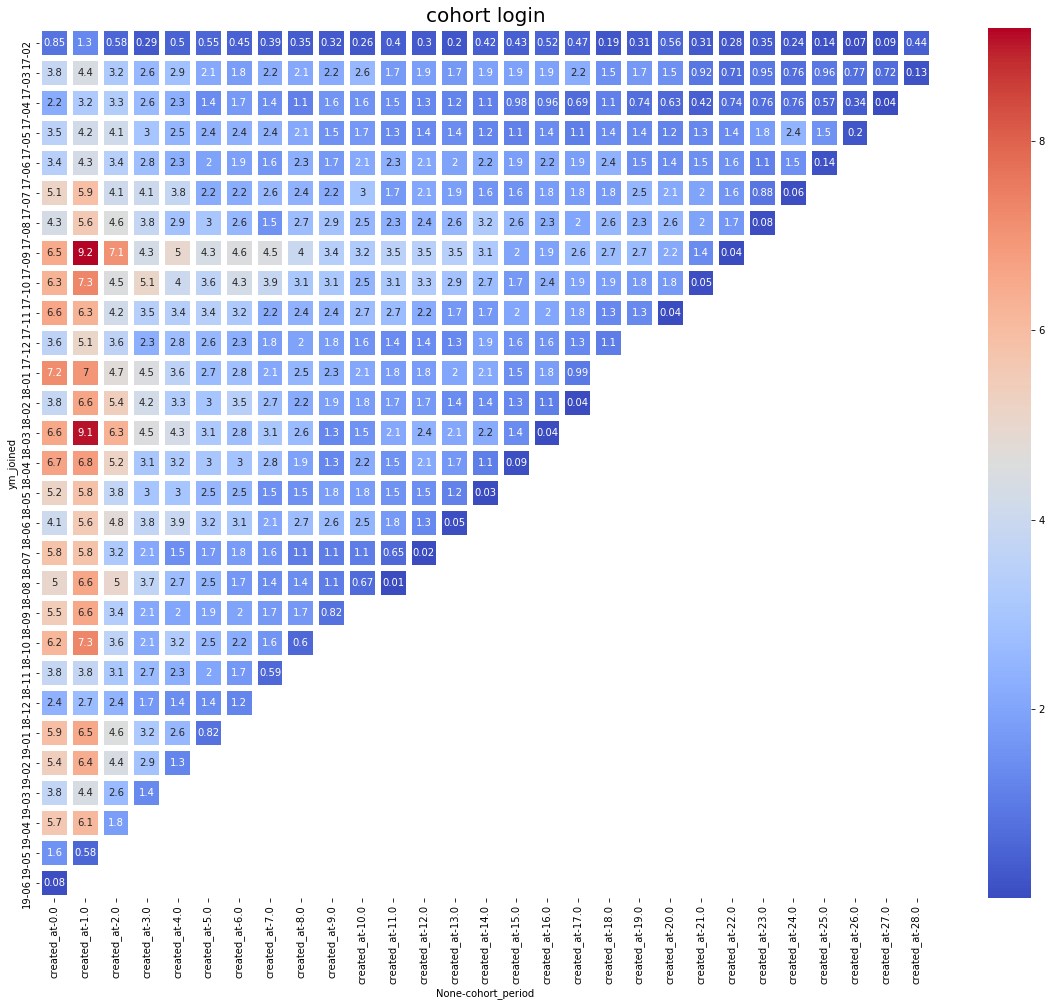

In [121]:
heatmap(cohort_login, title = 'cohort login', unit = None)

#### My Analysis

From this chart, we can see that normally the user group had the highest clicks in the second month after they join.

It might be because they start to realize the value of the product. However, as time goes by, some customers churned, and the login time drops.

The most attractive month is Sep. 2017 and Mar. 2018. It was probably due to the referal program around the end of 2017 and the marketing program at start of 2018 that time. It proves our prior strategy was effective!





(Note that this data is up to date in the middle June so login count in June looks a lot lower )

## Analysis on Retention

In [133]:
#creating table
cohort_survival = df.groupby(['ym_joined','cohort_period']).nunique().unstack()[['brand_id']]
cohort_survival.head()

brand_id                                                        \
cohort_period     0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0    
ym_joined                                                                      
17-02             18.0  14.0  14.0   7.0   5.0   7.0   6.0   6.0   5.0   4.0   
17-03             63.0  53.0  40.0  32.0  32.0  27.0  25.0  22.0  21.0  25.0   
17-04             52.0  39.0  33.0  30.0  23.0  21.0  23.0  21.0  19.0  21.0   
17-05             76.0  56.0  44.0  37.0  32.0  30.0  26.0  26.0  25.0  19.0   
17-06             88.0  62.0  38.0  37.0  32.0  31.0  26.0  26.0  21.0  24.0   

               ...                                                             
cohort_period  ...  19.0  20.0  21.0  22.0  23.0  24.0  25.0  26.0  27.0 28.0  
ym_joined      ...                                                             
17-02          ...   6.0   4.0   4.0   3.0   4.0   4.0   3.0   4.0   3.0  3.0  
17-03          ...  19.0  21.0  18.0  14.0  17.0  13.0  12.0  12.0  12.0  4.0  
17-04          ...  11.0   9.0   8.0  11.0  11.0   8.0   9.0   7.0   2.0  NaN  
17-05          ...  15.0  16.0  20.0  16.0  17.0  21.0  17.0   5.0   NaN  NaN  
17-06          ...  21.0  23.0  22.0  19.0  18.0  19.0   3.0   NaN   NaN  NaN  

[5 rows x 29 columns]

In [129]:
#creating an array of the first period customers
initial = df.groupby(['ym_joined','cohort_period']).nunique().unstack()['brand_id'][0].values


In [131]:
retention = cohort_survival.divide(initial, axis = 0)
retention.head()

brand_id                                                    \
cohort_period     0.0       1.0       2.0       3.0       4.0       5.0    
ym_joined                                                                  
17-02              1.0  0.777778  0.777778  0.388889  0.277778  0.388889   
17-03              1.0  0.841270  0.634921  0.507937  0.507937  0.428571   
17-04              1.0  0.750000  0.634615  0.576923  0.442308  0.403846   
17-05              1.0  0.736842  0.578947  0.486842  0.421053  0.394737   
17-06              1.0  0.704545  0.431818  0.420455  0.363636  0.352273   

                                                       ...            \
cohort_period      6.0       7.0       8.0       9.0   ...      19.0   
ym_joined                                              ...             
17-02          0.333333  0.333333  0.277778  0.222222  ...  0.333333   
17-03          0.396825  0.349206  0.333333  0.396825  ...  0.301587   
17-04          0.442308  0.403846  0.365385  0.403846  ...  0.211538   
17-05          0.342105  0.342105  0.328947  0.250000  ...  0.197368   
17-06          0.295455  0.295455  0.238636  0.272727  ...  0.238636   

                                                                           \
cohort_period      20.0      21.0      22.0      23.0      24.0      25.0   
ym_joined                                                                   
17-02          0.222222  0.222222  0.166667  0.222222  0.222222  0.166667   
17-03          0.333333  0.285714  0.222222  0.269841  0.206349  0.190476   
17-04          0.173077  0.153846  0.211538  0.211538  0.153846  0.173077   
17-05          0.210526  0.263158  0.210526  0.223684  0.276316  0.223684   
17-06          0.261364  0.250000  0.215909  0.204545  0.215909  0.034091   

                                             
cohort_period      26.0      27.0      28.0  
ym_joined                                    
17-02          0.222222  0.166667  0.166667  
17-03          0.190476  0.190476  0.063492  
17-04          0.134615  0.038462       NaN  
17-05          0.065789       NaN       NaN  
17-06               NaN       NaN       NaN  

[5 rows x 29 columns]

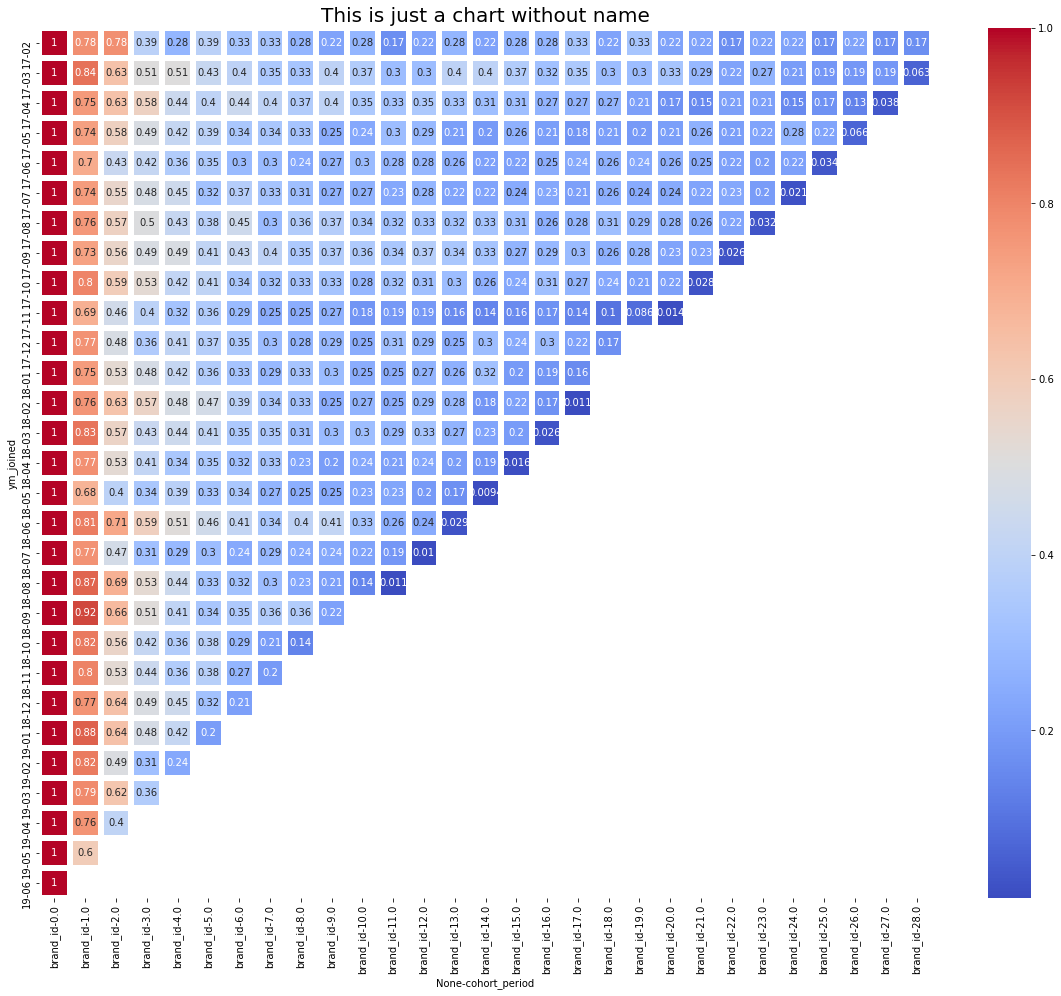

In [136]:
heatmap(retention)

#### My Analysis

In general, the retention rate would decay to around 20% - 25% in the long run.


The retention rate was dropping faster in the last few months. It turns out that we were having a marketing campaign towards some potential customers. The low retention suggests that the customers were not quite satisfied with our products, and we might targeted the wrong customers. 

invitees vs change overtime

#### This is just an example of my work for showing. Thank You!